In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

# Read data

## Twitter data

In [2]:
twitter1 = pd.read_csv("trayvontweets/Trayvon Tweets 2012.csv",encoding = "latin1")

/Users/ycr/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
twitter2 = pd.read_csv("trayvontweets/Trayvon Tweets 2013.csv",encoding = "latin1")

In [4]:
twitter = pd.concat([twitter1,twitter2],ignore_index=True)

In [5]:
twitter_message = twitter.loc[:,'message']

In [6]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 21 columns):
Unnamed: 0              int64
id                      int64
message_id              int64
user_handle             object
orig_user_id            int64
orig_user_handle        object
topsy_type              object
orig_date_posted_gmt    float64
date_posted_gmt         float64
message                 object
orig_user_location      object
coordinates             object
tweet_location          object
longitude               float64
latitude                float64
created_at_gmt          float64
seconds_after_event     float64
FIPS                    object
County                  object
City                    object
State                   object
dtypes: float64(6), int64(4), object(11)
memory usage: 336.0+ MB


## Media News data

In [3]:
directory = "Media Data Analysis/predict"
media1 = pd.DataFrame()
for file in os.listdir(directory):
    if file.endswith(".csv"):
        media = pd.read_csv(directory+"/"+file, encoding = "latin1")
        media1 = pd.concat([media1,media],ignore_index=True)

In [4]:
directory = "Media Data Analysis/train"
media2 = pd.DataFrame()
for file in os.listdir(directory):
    if file.endswith(".csv"):
        media = pd.read_csv(directory+"/"+file, encoding = "latin1")
        media2 = pd.concat([media2,media],ignore_index=True)

/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
media1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194897 entries, 0 to 194896
Data columns (total 6 columns):
id        0 non-null float64
Link      194897 non-null object
Title     194897 non-null object
Source    194897 non-null object
Date      194895 non-null object
Text      194897 non-null object
dtypes: float64(1), object(5)
memory usage: 8.9+ MB


In [7]:
media2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
Date          756 non-null object
Link          756 non-null object
Source        756 non-null object
Text          756 non-null object
Title         756 non-null object
Unnamed: 0    35 non-null float64
id            756 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 41.4+ KB


# Data clean

## Media1

In [17]:
media1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194897 entries, 0 to 194896
Data columns (total 6 columns):
id        0 non-null float64
Link      194897 non-null object
Title     194897 non-null object
Source    194897 non-null object
Date      194895 non-null object
Text      194897 non-null object
dtypes: float64(1), object(5)
memory usage: 8.9+ MB


All the id of media1 are null.     
Date of two rows are missing.

**standardize the date format**

In [18]:
media1_index_wrong_date = []
for i in range(0,media1.shape[0]):
    try:
        media1.loc[i,'Date_cleaned'] = datetime.strptime(media1.loc[i,'Date'], '%d %B %Y')
    except:
        media1_index_wrong_date.append(i)

In [19]:
media1.loc[media1_index_wrong_date,'Date']

192                     on immigrants could backfire on GOP
582                                             Oren Dorell
966                                                     NaN
5769             ; Troops remember five key moments in Iraq
6555                                              825 words
6991                                              822 words
7123                                         on Afghanistan
7199                                            in edgewise
7576                                  of support, for Brown
11572                        may be deemed harmful in China
19117                      what sent shooter 'over the top'
29799     ; Judges must place law above personal feeling...
30484                               getting harder to crack
31662      a new movement ; Take a Facebook post that 'b...
32093             still needed in struggle for civil rights
32465                                             478 words
35584                                   

**extract the real titles from column 'Title'**

In [20]:
media1_index_wrong_title = []
for i in range(0,len(media1)):
    try:
        media1.loc[i,'Title_cleaned'] = media1.loc[i,'Title'].split('\n')[1].rstrip()
    except:
        media1_index_wrong_title.append(i)

In [21]:
media1.loc[media1_index_wrong_title,'Title']

42100    REVIEW --- Ideas Market -- Week in Words: A fi...
44829    REVIEW --- Ideas Market -- Week In Words: A fi...
61818    A Controversial Way to Score Concert Tickets -...
65975                                                  Key
66903                                                  Key
67377    Dallas Police Murders: Activists Tread Fine Li...
68772                                                  Key
70163                                     U.S. News -- Key
70938                                                  Key
72034                                                  Key
80366    World News: China Detains Uighurs on a Vast Sc...
80605                       EXCHANGE --- Technology -- Key
80977                                                  Key
81389    In China, Chat Group Banter Can Lead to Jail -...
Name: Title, dtype: object

In [22]:
media1_index_wrong_title = [title for title in media1_index_wrong_title if title not in [61818,67377,80366,81389]]

**clean text**

**undo**

###############

**drop all rows with wrong date or title**

In [87]:
media1_cleaned = media1.drop(media1_index_wrong_title+media1_index_wrong_date,axis = 0)

In [89]:
media1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194816 entries, 0 to 194896
Data columns (total 6 columns):
id        0 non-null float64
Link      194816 non-null object
Title     194816 non-null object
Source    194816 non-null object
Date      194816 non-null object
Text      194816 non-null object
dtypes: float64(1), object(5)
memory usage: 10.4+ MB


## Media2

In [91]:
media2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
Date          756 non-null object
Link          756 non-null object
Source        756 non-null object
Text          756 non-null object
Title         756 non-null object
Unnamed: 0    35 non-null float64
id            756 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 41.4+ KB


**standardize the data format**

In [96]:
for i in range(0,media2.shape[0]):
    for fmt in ('%m/%d/%y %H:%M','%d-%b-%y','%Y-%m-%d %H:%M:%S','%d %B %Y'):
        try:
            media2.loc[i,'Date'] = datetime.strptime(media2.loc[i,'Date'], fmt)
        except:
            pass

**Unnamed??????????**   
#########################   
**TODO**

# EDA

In [111]:
media2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
Date          756 non-null object
Link          756 non-null object
Source        756 non-null object
Text          756 non-null object
Title         756 non-null object
Unnamed: 0    35 non-null float64
id            756 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 41.4+ KB


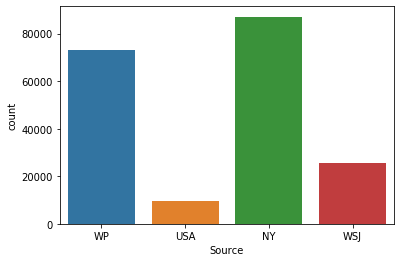

In [104]:
sns.countplot(x = 'Source', data = media1)

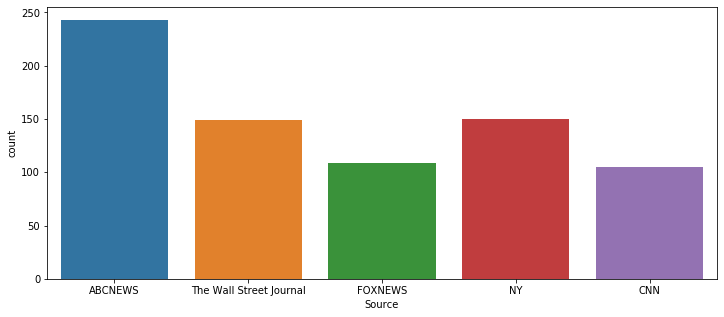

In [110]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'Source', data = media2)

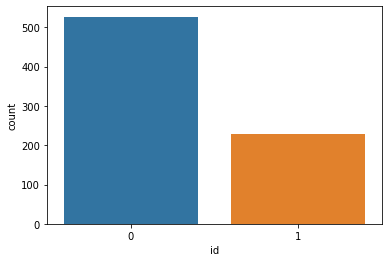

In [112]:
sns.countplot(x = 'id', data = media2)

**word cloud for text?**
##########    
TODO 

In [8]:
media_text = media1.loc[:,'Text']

In [10]:
wordcloud = WordCloud().generate(media_text)

NameError: name 'WordCloud' is not defined

In [ ]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
